## Exploration

In this dataset, there are 4392 samples, each representing a different company, and 221 features; 218 are independent features, 2 are dependent features, and 1 feature is non-predictive (ticker symbol).

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import train_test_split
from sklearn import svm
from itertools import product

dataRaw = pd.read_csv('2018_Financial_Data.csv')
x = dataRaw.isna().sum() #this shows us the number of missing values in each column
print("Total missing values:", x.sum())
dataRaw

Total missing values: 97298


,Stock,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
4388,YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
4389,ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0
4390,ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,...,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0


There are 97,298 missing values in the dataset, all from independent features. This is a fairly large value; it accounts for 10.16% of all independent features.

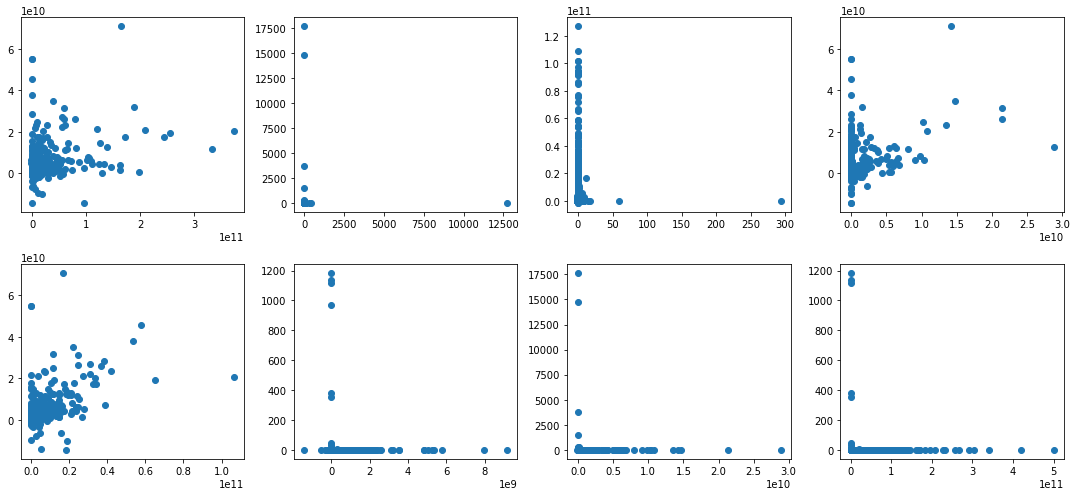

In [2]:
fig, ax = plt.subplots(2,4,figsize=(15,7))
ax[0,0].scatter(dataRaw['Cost of Revenue'], dataRaw['Operating Income'])
ax[0,1].scatter(dataRaw['Revenue Growth'], dataRaw['Debt Growth'])
ax[1,0].scatter(dataRaw['SG&A Expense'], dataRaw['Operating Income'])
ax[1,1].scatter(dataRaw['Interest Expense'], dataRaw['Asset Growth'])
ax[0,2].scatter(dataRaw['Inventory Growth'], dataRaw['Gross Profit'])
ax[1,2].scatter(dataRaw['R&D Expenses'], dataRaw['Debt Growth'])
ax[0,3].scatter(dataRaw['R&D Expenses'], dataRaw['Operating Income'])
ax[1,3].scatter(dataRaw['Revenue'], dataRaw['Asset Growth'])
fig.tight_layout()

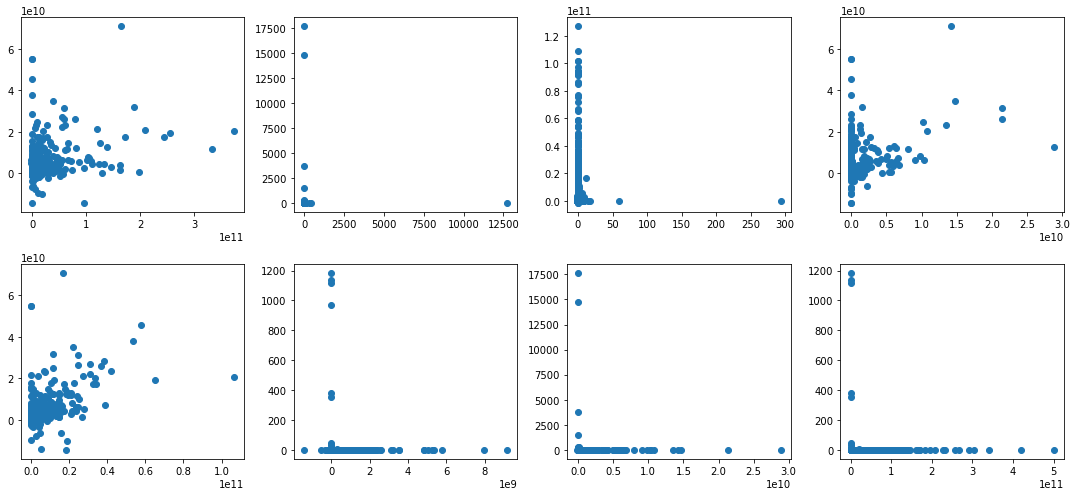

In [3]:
temp = dataRaw
for x in ['Revenue Growth']:
    q75,q25 = np.percentile(temp.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    temp.loc[temp[x] < min,x] = np.nan
    temp.loc[temp[x] > max,x] = np.nan
    
for x in ['R&D Expenses']:
    q75,q25 = np.percentile(temp.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    temp.loc[temp[x] < min,x] = np.nan
    temp.loc[temp[x] > max,x] = np.nan
    
for x in ['Operating Income']:
    q75,q25 = np.percentile(temp.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    temp.loc[temp[x] < min,x] = np.nan
    temp.loc[temp[x] > max,x] = np.nan
    
for x in ['Debt Growth']:
    q75,q25 = np.percentile(temp.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    temp.loc[temp[x] < min,x] = np.nan
    temp.loc[temp[x] > max,x] = np.nan
    
fig, ax = plt.subplots(2,4,figsize=(15,7))
ax[0,0].scatter(temp['Cost of Revenue'], temp['Operating Income'])
ax[0,1].scatter(temp['Revenue Growth'], temp['Debt Growth'])
ax[1,0].scatter(temp['SG&A Expense'], temp['Operating Income'])
ax[1,1].scatter(temp['Interest Expense'], temp['Asset Growth'])
ax[0,2].scatter(temp['Inventory Growth'], temp['Gross Profit'])
ax[1,2].scatter(temp['R&D Expenses'], temp['Debt Growth'])
ax[0,3].scatter(temp['R&D Expenses'], temp['Operating Income'])
ax[1,3].scatter(temp['Revenue'], temp['Asset Growth'])
fig.tight_layout()

After plotting several relationships between several features, we can see that some features have some correlation while a lot of others do not. Even after taking out the outliers there still appears to be minimal correlation.

## Pre-processing

First we separate the data into the dependent and independent variables. Since I am implementing a classification task, I am going to use 'Class' as the dependent variable. Thus, I assign that column to be the dependent variable. In addition, '2019 PRICE VAR [%]' is unimportant to this task because it is the dependent variable for a regression task. So I remove that column from the independent variables, along with 'Stock' and 'Sector'. The 'Stock' column is removed because I believe it is a reasonable assumption that the ticker symbol has no effect on the performance of stock, and I temporarily remove 'Sector' since it contains categorial values that will interfere with operations that require numerical values only.

In [4]:
dataY = dataRaw['Class']
dataX = dataRaw.drop(['Stock','Sector','2019 PRICE VAR [%]','Class'], axis=1)
dataX

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth
0,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0.2558,0.1865,0.2348,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308
1,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,0.0000,-0.1421,-0.2785,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265
2,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0.0815,0.0592,0.0772,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942
3,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0.0000,0.0000,0.0000,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942
4,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,-0.1139,-0.1408,-0.2619,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,NaN,NaN,0.0000,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602
4388,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,...,0.0000,0.0000,0.0000,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993
4389,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,NaN,NaN,0.0000,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987
4390,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,-1.664769e+07,...,NaN,NaN,NaN,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457


Above we can see there are 97,298 missing values in the dataset. We use SimpleImputer to replace the missing values with the mean of the column that the missing value is located in. Then we can use df.isna().sum() to check that all missing values have been replaced.

In [5]:
imputer = SimpleImputer(fill_value=np.nan, strategy='mean')
dataX1 = imputer.fit_transform(dataX)
dataX1 = pd.DataFrame(dataX1, columns = dataX.columns)

x = dataX1.isna().sum()
print("Total missing values:",x.sum())

Total missing values: 0


After replacing missing values, we can append the 'Sector' section back to the data and implement label encoding on that column to convert the categorial values into numerical values.

In [6]:
append = dataRaw[['Sector']]
dataX1 = dataX1.join(append) #adding back 'Sector' since it would interfere with SimpleImputer; its entries are non-numerical

# Now we can convert the categorial values of 'Sector' to numerical values
l1 = LabelEncoder()
l1.fit(dataX1['Sector'])
dataX1.Sector = l1.transform(dataX1.Sector)
dataX1

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector
0,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0.186500,0.234800,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,2
1,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,-0.142100,-0.278500,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,4
2,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0.059200,0.077200,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,9
3,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0.000000,0.000000,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,9
4,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,-0.140800,-0.261900,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,-0.010214,0.000000,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,8
4388,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,...,0.000000,0.000000,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,0
4389,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,-0.010214,0.000000,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,0
4390,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,-1.664769e+07,...,-0.010214,0.006081,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,7


Lastly, we normalize the dataset because normalized data allows machine learning models to perform in an optimal manner. Normalization is the process of changing the values to a common scale such that the difference in range of values isn't distorted.

In [7]:
ss = StandardScaler()
dataX1.iloc[:,0:221] = ss.fit_transform(dataX1.iloc[:,0:221])

## Feature Learning/Extraction

Because I don't believe the features of this dataset are correlated (from scatters above and reading the feature descriptions), I will use t-distributed Stochastic Neighbor Embedding, which is typically used on high-dimensional datasets. It minimizes the divergence between a distribution deployed by the pairwise probability similarities of the input features in the original high dimensional space and its equivalent in the reduced low dimensional space. Then t-SNE uses the Kullback-Leiber divergence in order to measure the dissimilarity of the 2 distributions, which is minimized through gradient descent.

In [15]:
start = time.process_time()
tsne = TSNE(n_components=3, verbose=1, perplexity=4000, n_iter=400)
X_tsne = tsne.fit_transform(dataX1)
print(time.process_time() - start)

[t-SNE] Computing 4391 nearest neighbors...
[t-SNE] Indexed 4392 samples in 0.002s...
[t-SNE] Computed neighbors for 4392 samples in 2.234s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4392
[t-SNE] Computed conditional probabilities for sample 2000 / 4392
[t-SNE] Computed conditional probabilities for sample 3000 / 4392
[t-SNE] Computed conditional probabilities for sample 4000 / 4392
[t-SNE] Computed conditional probabilities for sample 4392 / 4392
[t-SNE] Mean sigma: 12.876912
[t-SNE] KL divergence after 250 iterations with early exaggeration: 30.351416
[t-SNE] KL divergence after 400 iterations: 0.011173
1158.65625


## Machine Learning Methods

Now we can proceed with the machine learning methods. I will be implementing a random forest classifier and a support vector machine for this task. 

The purpose of a random forest classifier is to take the average of a number of decision trees on different subsets of a dataset to improve the accuracy of the model. More trees will allow for better accuracy.

The purpose of SVM is to segregate the given dataset in the best possible way such that a hyperplane with the maximum possible margin between support will be selected. First, the hyperplanes are generated and then the best hyperplane is selected. Oftentimes, the dataset can't be separated linearly, so kernel tricks are implemented to transform the input space into higher dimensional space such that a hyperplane can be placed between the data correctly.

### Random Forest Classifier

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_tsne, dataY, test_size = 0.2) #splitting into test/train
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=1000).fit(X_train,y_train)

print(time.process_time() - start)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
print("Accuracy:",metrics.accuracy_score(y_test, predictionforest))


4.890625
[[ 80 194]
 [ 79 526]]
              precision    recall  f1-score   support

           0       0.50      0.29      0.37       274
           1       0.73      0.87      0.79       605

    accuracy                           0.69       879
   macro avg       0.62      0.58      0.58       879
weighted avg       0.66      0.69      0.66       879

Accuracy: 0.689419795221843


## Support Vector Machine

In [23]:
clf = svm.SVC(kernel='rbf').fit(X_train, y_train)

print(time.process_time() - start)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

70.4375
[[ 17 257]
 [ 10 595]]
              precision    recall  f1-score   support

           0       0.63      0.06      0.11       274
           1       0.70      0.98      0.82       605

    accuracy                           0.70       879
   macro avg       0.66      0.52      0.46       879
weighted avg       0.68      0.70      0.60       879

Accuracy: 0.6962457337883959


## Comparative Analysis

In [25]:
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
print("Accuracy:",metrics.accuracy_score(y_test, predictionforest))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[ 80 194]
 [ 79 526]]
              precision    recall  f1-score   support

           0       0.50      0.29      0.37       274
           1       0.73      0.87      0.79       605

    accuracy                           0.69       879
   macro avg       0.62      0.58      0.58       879
weighted avg       0.66      0.69      0.66       879

Accuracy: 0.689419795221843
[[ 17 257]
 [ 10 595]]
              precision    recall  f1-score   support

           0       0.63      0.06      0.11       274
           1       0.70      0.98      0.82       605

    accuracy                           0.70       879
   macro avg       0.66      0.52      0.46       879
weighted avg       0.68      0.70      0.60       879

Accuracy: 0.6962457337883959


The top confusion matrix is produced by the random forest classifier while the bottom confusion matrix is produced by the support vector machine. We can see that the precision for predicting a stock will decrease is not that accurate for both machine learning models, whereas the precision for predicting a stock increase is much higher, yet still not accurate. We can see that the accuracy of the SVM was slightly better than that of the RFC.